In [1]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from PIL import Image

In [2]:
# Set global plot parameters
plt.rcParams["font.family"] = "Avenir"
plt.rcParams["font.size"] = 20
plt.rcParams["axes.linewidth"] = 0

In [3]:
# Filepaths for the pizza and pasta images
filepath_pizza = "./photos/pizza/*"
filepath_pasta = "./photos/pasta/*"

In [4]:
# Collect all the image filepaths into lists
pizza_files = [file for file in glob.iglob(filepath_pizza)]
pasta_files = [file for file in glob.iglob(filepath_pasta)]

In [5]:
# Construct pandas dataframe with all the image filenames and labels
df_photos = (
    pd.DataFrame({"filepath": pizza_files, "label": np.zeros(len(pizza_files))})
    .append(
        pd.DataFrame({"filepath": pasta_files, "label": np.ones(len(pasta_files))})
    )
)

In [6]:
df_photos

,filepath,label
0,./photos/pizza/Image_420.png,0.0
1,./photos/pizza/Image_193.jpg,0.0
2,./photos/pizza/Image_187.jpg,0.0
3,./photos/pizza/Image_178.jpg,0.0
4,./photos/pizza/Image_150.jpg,0.0
...,...,...
495,./photos/pasta/Image_388.jpg,1.0
496,./photos/pasta/Image_18.jpg,1.0
497,./photos/pasta/Image_149.jpg,1.0
498,./photos/pasta/Image_161.jpg,1.0


In [7]:
# Split the dataset into training and test sets
df_train, df_test = train_test_split(df_photos, test_size=0.2, random_state=1)
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [8]:
df_train

,filepath,label
0,./photos/pizza/Image_466.JPG,0.0
1,./photos/pasta/Image_30.jpg,1.0
2,./photos/pasta/Image_362.jpg,1.0
3,./photos/pizza/Image_230.jpg,0.0
4,./photos/pasta/Image_353.jpg,1.0
...,...,...
795,./photos/pasta/Image_112.jpg,1.0
796,./photos/pizza/Image_368.jpg,0.0
797,./photos/pasta/Image_415.jpg,1.0
798,./photos/pizza/Image_452.jpg,0.0


In [9]:
# Wrapper function to load and process images
def process_image(filepath):
    return np.asarray(Image.open(filepath).resize((128, 128)).convert("L")) / 255.0

In [10]:
# Load image
img = process_image(pizza_files[0])

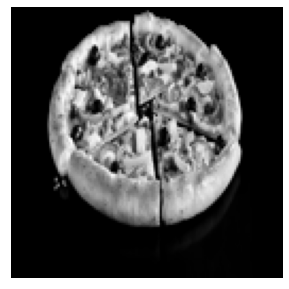

In [11]:
# Plot image
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.imshow(img, cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

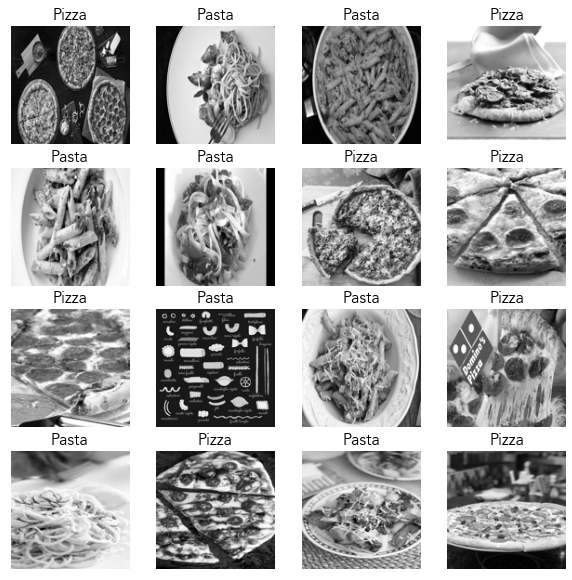

In [12]:
# Plot 16 images from our training set with labels
fig = plt.figure(figsize=(10, 10))

for i in range(16):
    plt.subplot(4, 4, i+1)
    img = process_image(df_train["filepath"].iloc[i])
    plt.imshow(img, cmap="gray")
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    if df_train["label"].iloc[i] == 0:
        plt.title("Pizza", size=16)
    else:
        plt.title("Pasta", size=16)

plt.show()

In [13]:
# Create array of training images
train_images = np.empty([df_train.shape[0], 128, 128])

for index, row in df_train.iterrows():
    img = process_image(row.filepath)
    train_images[index] = img

/Users/naveenvenkatesan/miniconda3/envs/dev/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [14]:
# Create array of training labels
train_labels = df_train["label"].to_numpy()

In [15]:
# Create array of test images
test_images = np.empty([df_test.shape[0], 128, 128])

for index, row in df_test.iterrows():
    img = process_image(row.filepath)
    test_images[index] = img

In [16]:
# Create array of test labels
test_labels = df_test["label"].to_numpy()

In [17]:
# Create our model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(128, 128)),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               4194560   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 4,195,074
Trainable params: 4,195,074
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Set the learning rate
opt = keras.optimizers.Adam(learning_rate=0.000005)

# Compile our model
model.compile(optimizer=opt,
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
# Train our model
history = model.fit(train_images, train_labels, epochs=50, validation_split=0.2)

Epoch 1/50
20/20 [==============================] - 0s 15ms/step - loss: 0.6825 - accuracy: 0.5844 - val_loss: 0.6736 - val_accuracy: 0.5437
Epoch 2/50
20/20 [==============================] - 0s 9ms/step - loss: 0.6491 - accuracy: 0.6609 - val_loss: 0.6645 - val_accuracy: 0.5938
Epoch 3/50
20/20 [==============================] - 0s 9ms/step - loss: 0.6379 - accuracy: 0.6516 - val_loss: 0.6426 - val_accuracy: 0.6500
Epoch 4/50
20/20 [==============================] - 0s 9ms/step - loss: 0.6312 - accuracy: 0.6828 - val_loss: 0.6296 - val_accuracy: 0.6750
Epoch 5/50
20/20 [==============================] - 0s 9ms/step - loss: 0.6273 - accuracy: 0.6562 - val_loss: 0.6220 - val_accuracy: 0.6875
Epoch 6/50
20/20 [==============================] - 0s 10ms/step - loss: 0.6085 - accuracy: 0.7266 - val_loss: 0.6348 - val_accuracy: 0.6812
Epoch 7/50
20/20 [==============================] - 0s 10ms/step - loss: 0.6128 - accuracy: 0.6969 - val_loss: 0.6110 - val_accuracy: 0.7000
Epoch 8/50
20/20 

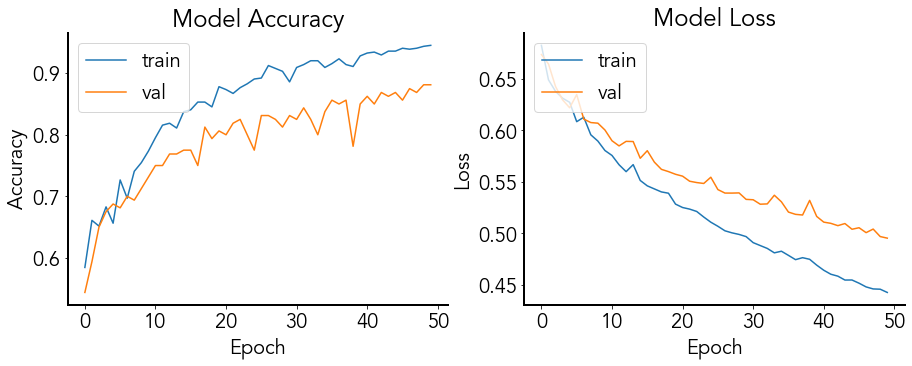

In [21]:
# Plot accuracy
plt.rcParams["axes.linewidth"] = 2
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['train', 'val'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['train', 'val'], loc='upper left')

plt.show()

In [22]:
# Evaluate training accuracy
model.evaluate(test_images, test_labels, verbose=2)

7/7 - 0s - loss: 0.5284 - accuracy: 0.8350


[0.5283665060997009, 0.8349999785423279]

In [23]:
# Function to return prediction and probability
def model_prediction(model, img):
    predictions = model.predict(np.array([img]))
    
    if predictions[0][0] > predictions[0][1]:
        return f"Pizza: {round(100*predictions[0][0], 2)}%"
    else:
        return f"Pasta: {round(100*predictions[0][1], 2)}%"

In [24]:
# Load image of cacio e pepe
cacio_e_pepe = process_image("./cacioepepe.jpg")

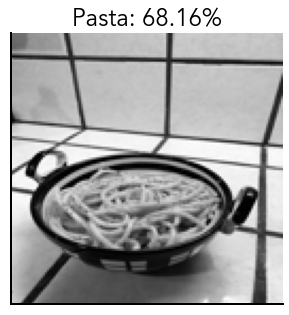

In [25]:
# Plot image along with prediction
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.imshow(cacio_e_pepe, cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(model_prediction(model, cacio_e_pepe))
plt.show()

In [26]:
# Load image of pizza
home_pizza = process_image("./pizza.jpg")

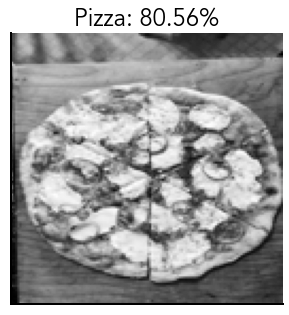

In [27]:
# Plot image along with prediction
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.imshow(home_pizza, cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(model_prediction(model, home_pizza))
plt.savefig("image.png", dpi=100, bbox_inches="tight")
plt.show()